## Importing Dependencies:

In [1]:
import pandas as pd
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as stattools
import warnings

## Loading Data:

In [2]:
df = pd.read_csv("../Resources/emissions_since1961_total_data.csv")
df.head()

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
0,Australia,AUS,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,NaN,10483000,8.614547,0.151
1,Australia,AUS,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,NaN,10742000,8.852126,0.118
2,Australia,AUS,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,NaN,10950000,9.245287,-0.111
3,Australia,AUS,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,NaN,11167000,9.780775,-0.029
4,Australia,AUS,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,NaN,11388000,10.638962,0.121


## Data exploration from Emissions_ML:

In [3]:
# How many and which countries are in our dataset?
print(len(df['country'].unique()))
print(df['country'].unique())

46
['Australia' 'Austria' 'Belarus' 'Belgium' 'Brazil' 'Bulgaria' 'Canada'
 'China' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan'
 'Kazakhstan' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal' 'South Korea'
 'Romania' 'Russia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'Ukraine' 'United Kingdom' 'USA' 'Global']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       2806 non-null   object 
 1   country_code  2806 non-null   object 
 2   year          2806 non-null   int64  
 3   total         2806 non-null   float64
 4   coal          2777 non-null   float64
 5   oil           2777 non-null   float64
 6   gas           2777 non-null   float64
 7   cement        2776 non-null   float64
 8   flaring       2777 non-null   float64
 9   other         1530 non-null   float64
 10  population    2806 non-null   int64  
 11  per_capita    2806 non-null   float64
 12  temp_change   2385 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 285.1+ KB


In [5]:
# Which countries are missing coal data?
df[df['coal'].isnull()]["country"].unique()

array(['Liechtenstein'], dtype=object)

In [6]:
# It appears almost all of our missing values from coal, oil, gas, cement, and flaring are from Liechtenstein
# Because there are too many values missing in these rows, we will drop them
df[(df['country'] == 'Liechtenstein') & df['coal'].isnull() == True]

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
1464,Liechtenstein,LIE,1961,0.0,NaN,NaN,NaN,NaN,NaN,NaN,16834,0.0,1.057
1465,Liechtenstein,LIE,1962,0.0,NaN,NaN,NaN,NaN,NaN,NaN,17221,0.0,-0.484
1466,Liechtenstein,LIE,1963,0.0,NaN,NaN,NaN,NaN,NaN,NaN,17625,0.0,-0.775
1467,Liechtenstein,LIE,1964,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18058,0.0,0.060
1468,Liechtenstein,LIE,1965,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18500,0.0,-0.834
1469,Liechtenstein,LIE,1966,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18957,0.0,0.414
1470,Liechtenstein,LIE,1967,0.0,NaN,NaN,NaN,NaN,NaN,NaN,19467,0.0,0.549
1471,Liechtenstein,LIE,1968,0.0,NaN,NaN,NaN,NaN,NaN,NaN,20011,0.0,0.018
1472,Liechtenstein,LIE,1969,0.0,NaN,NaN,NaN,NaN,NaN,NaN,20558,0.0,-0.012
1473,Liechtenstein,LIE,1970,0.0,NaN,NaN,NaN,NaN,NaN,NaN,21089,0.0,-0.550


In [7]:
# Where is the other missing value in cement?
df[df['cement'].isnull()]["country"].unique()

array(['Iceland', 'Liechtenstein'], dtype=object)

In [8]:
# The last missing value from cement is in Iceland 2021
df[(df['country'] == 'Iceland') & (df['cement'].isnull() == True)]

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
1158,Iceland,ISL,2021,3.374964,0.667573,2.526131,0.0002,NaN,0.174873,0.006187,372520,9.113272,0.993


In [9]:
# The cement values have been 0 since 2012, so we can fill this value in as 0 too. 
df[(df['country'] == 'Iceland') & (df['year'] > 2010)]

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
1148,Iceland,ISL,2011,3.494164,0.639488,2.652413,0.000161,0.019647,0.179512,0.002943,319014,10.943442,1.026
1149,Iceland,ISL,2012,3.490870,0.658973,2.655749,0.000041,0.000000,0.172050,0.004056,320716,10.875697,0.748
1150,Iceland,ISL,2013,3.480080,0.661003,2.642490,0.000062,0.000000,0.173138,0.003387,323764,10.740192,0.776
1151,Iceland,ISL,2014,3.436352,0.625165,2.625463,0.000148,0.000000,0.182954,0.002622,327386,10.488067,1.737
1152,Iceland,ISL,2015,3.533853,0.661181,2.705333,0.000182,0.000000,0.163135,0.004022,330815,10.674359,0.494
1153,Iceland,ISL,2016,3.485184,0.660089,2.672440,0.000080,0.000000,0.148961,0.003613,335439,10.382613,1.485
1154,Iceland,ISL,2017,3.601620,0.693221,2.758626,0.000048,0.000000,0.146479,0.003247,343400,10.481037,1.770
1155,Iceland,ISL,2018,3.658953,0.715029,2.783351,0.000032,0.000000,0.156462,0.004080,352721,10.366893,0.892
1156,Iceland,ISL,2019,3.546263,0.684012,2.692315,0.000227,0.000000,0.163106,0.006603,360563,9.829598,1.396
1157,Iceland,ISL,2020,3.328876,0.667573,2.480043,0.000200,0.000000,0.174873,0.006187,366463,9.078694,0.851


In [10]:
# What about the values missing from other? 
# It seems almost every country is missing other data.
df[df['other'].isnull()]["country"].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Kazakhstan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'South Korea',
       'Romania', 'Russia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Global'],
      dtype=object)

In [11]:
# Let's look at a few and see where the values are missing
# missing from 1961 to 1989
df[(df['country'] == 'Australia') & (df['other'].isnull() == True)]['year'].values

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989])

In [12]:
# These are also missing from 1961 to 1989
df[(df['country'] == 'Finland') & (df['other'].isnull() == True)]['year'].values

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989])

In [13]:
# The same trend can be seen here.
# It's possible whatever the other column is measuring either didn't exist or wasn't measured yet for most countries
# Rather than removing all of these rows, we might instead assume their values were 0 and fill them in as such
df[(df['country'] == 'Ukraine') & (df['other'].isnull() == True)]['year'].values

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989])

In [14]:
# The final missing values to look into are from temp_change
# Lets look at which countries are missing values and how many
# While we are missing about half of the target values for these countries for now we will only remove these rows
    # However, it may be better to simply remove these countries from the dataset
for country in df[df['temp_change'].isnull()]["country"].unique():
    print(country)
    print(61 - len(df[(df['country'] == country) & (df['temp_change'].isnull())]))
    print("--------------------")

Belarus
30
--------------------
Belgium
22
--------------------
Croatia
30
--------------------
Czech Republic
29
--------------------
Estonia
30
--------------------
Kazakhstan
30
--------------------
Latvia
30
--------------------
Lithuania
30
--------------------
Luxembourg
22
--------------------
Russia
30
--------------------
Slovakia
29
--------------------
Slovenia
30
--------------------
Ukraine
30
--------------------


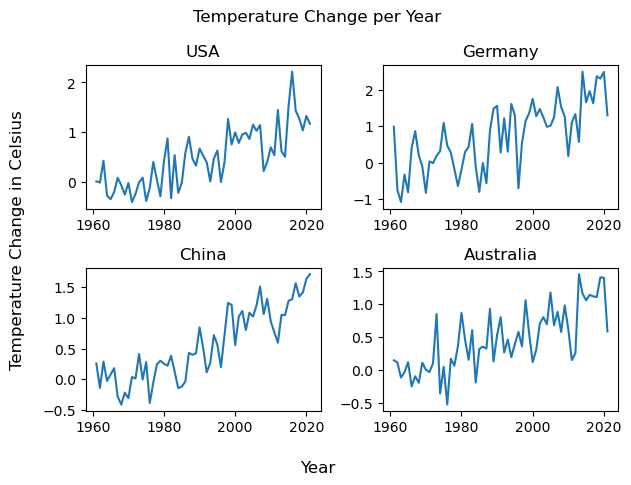

In [15]:
# Finally, let's look at a plot of temperature change vs year for a few countries to see what our target looks like
# As we can see the values bounce up and down (perhaps in some pattern), so the variance and also RMSE will be higher
fig, axs = plt.subplots(2, 2)

USA = df[df['country'] == 'USA']
Germany = df[df['country'] == 'Germany']
China = df[df['country'] == 'China']
Australia = df[df['country'] == 'Australia']

axs[0,0].plot(USA['year'], USA['temp_change'])
axs[0,0].set_title("USA")

axs[0,1].plot(Germany['year'], Germany['temp_change'])
axs[0,1].set_title("Germany")

axs[1,0].plot(China['year'], China['temp_change'])
axs[1,0].set_title("China")

axs[1,1].plot(Australia['year'], Australia['temp_change'])
axs[1,1].set_title("Australia")

fig.suptitle("Temperature Change per Year")
fig.supxlabel('Year')
fig.supylabel('Temperature Change in Celsius')
plt.tight_layout()
plt.show()

In [16]:
# Remove the countries that were missing about half their target values
df_temp = df[~df['country'].isin(df[df['temp_change'].isnull()]["country"].unique())]

# Remove the rows where coal (and oil, gas, cement, and flaring) is null
df_dropped = df_temp[df_temp['coal'].notnull()]

## Cleaning the data (also from Emissions_ML):

In [17]:
# Remove the rows where temp change is null
df_temp = df[df['temp_change'].notnull()]

# Remove the rows where coal (and oil, gas, cement, and flaring) is null
df_dropped = df_temp[df_temp['coal'].notnull()]

In [18]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       2356 non-null   object 
 1   country_code  2356 non-null   object 
 2   year          2356 non-null   int64  
 3   total         2356 non-null   float64
 4   coal          2356 non-null   float64
 5   oil           2356 non-null   float64
 6   gas           2356 non-null   float64
 7   cement        2355 non-null   float64
 8   flaring       2356 non-null   float64
 9   other         1486 non-null   float64
 10  population    2356 non-null   int64  
 11  per_capita    2356 non-null   float64
 12  temp_change   2356 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 257.7+ KB


In [19]:
# Fill in the missing values from other and cement as 0
# Or I could fill in the other column with mean
#df_filled = df_dropped.fillna(value={'other': df_dropped.groupby('country')['other'].transform('mean'),
#                                    'cement': 0})

df_filled = df_dropped.fillna(value={'other': 0,
                                    'cement': 0})

In [20]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       2356 non-null   object 
 1   country_code  2356 non-null   object 
 2   year          2356 non-null   int64  
 3   total         2356 non-null   float64
 4   coal          2356 non-null   float64
 5   oil           2356 non-null   float64
 6   gas           2356 non-null   float64
 7   cement        2356 non-null   float64
 8   flaring       2356 non-null   float64
 9   other         2356 non-null   float64
 10  population    2356 non-null   int64  
 11  per_capita    2356 non-null   float64
 12  temp_change   2356 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 257.7+ KB


## Awesome encoding from Emission_ML:

In [21]:
# Encode the countries. Because the number value matters we need the countries to be sorted in some way.
# Therefore they will be sorted by the total emissions column from 2021
country_encoding = {}
num = 1
for country in df_filled[df_filled['year'] == 2021].sort_values(by='total')['country']:
    country_encoding[country] = num
    num += 1

In [22]:
country_encoding

{'Liechtenstein': 1,
 'Malta': 2,
 'Iceland': 3,
 'Latvia': 4,
 'Cyprus': 5,
 'Luxembourg': 6,
 'Estonia': 7,
 'Slovenia': 8,
 'Lithuania': 9,
 'Croatia': 10,
 'Denmark': 11,
 'New Zealand': 12,
 'Switzerland': 13,
 'Slovakia': 14,
 'Sweden': 15,
 'Ireland': 16,
 'Finland': 17,
 'Portugal': 18,
 'Norway': 19,
 'Bulgaria': 20,
 'Hungary': 21,
 'Greece': 22,
 'Belarus': 23,
 'Austria': 24,
 'Romania': 25,
 'Belgium': 26,
 'Czech Republic': 27,
 'Netherlands': 28,
 'Ukraine': 29,
 'Spain': 30,
 'Kazakhstan': 31,
 'France': 32,
 'Poland': 33,
 'Italy': 34,
 'United Kingdom': 35,
 'Australia': 36,
 'Turkey': 37,
 'Brazil': 38,
 'Canada': 39,
 'South Korea': 40,
 'Germany': 41,
 'Japan': 42,
 'Russia': 43,
 'USA': 44,
 'China': 45,
 'Global': 46}

In [23]:
# Apply this encoding to create a new numerical column for the countries - called country_num
df_filled['country_num'] = df_filled['country'].apply(lambda x: country_encoding[x])

In [24]:
df_filled.head()

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change,country_num
0,Australia,AUS,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,0.0,10483000,8.614547,0.151,36
1,Australia,AUS,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,0.0,10742000,8.852126,0.118,36
2,Australia,AUS,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,0.0,10950000,9.245287,-0.111,36
3,Australia,AUS,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,0.0,11167000,9.780775,-0.029,36
4,Australia,AUS,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,0.0,11388000,10.638962,0.121,36


In [25]:
# If I get rid of other column
# It seems like dropping or keeping the other column didn't make much of a difference (nor did how I fill values in)
df_final = df_filled[['country_num', 'year', 'total', 'coal', 'oil', 
                      'gas', 'cement', 'flaring', 'population', 
                      'per_capita', 'temp_change']]

In [26]:
# Make country_num the first column and get rid of the categorical country and country_code columns
df_final = df_filled[['country_num', 'year', 'total', 'coal', 'oil', 
                      'gas', 'cement', 'flaring', 'other', 'population', 
                      'per_capita', 'temp_change']]

In [27]:
df_final.head()

,country_num,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
0,36,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,0.0,10483000,8.614547,0.151
1,36,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,0.0,10742000,8.852126,0.118
2,36,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,0.0,10950000,9.245287,-0.111
3,36,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,0.0,11167000,9.780775,-0.029
4,36,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,0.0,11388000,10.638962,0.121


In [28]:
df_years = df_final['year'].values
df_train = df_years[:2012]

In [ ]:
df_final = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
d = 0

# Find the order of differencing needed for time series (order=(p,d,q))
p_value = 1
while p_value > 0.05:
    result = stattools.adfuller(df_final, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    p_value = result[1]
    d += 1
    data = np.diff(df_final)

# Plot the ACF
tsaplots.plot_acf(df_final, lags=20)
plt.show()

# Plot the PACF
tsaplots.plot_pacf(df_final, lags=20)
plt.show()

## ARIMA Machine Learning model:

In [30]:
model = ARIMA(df_train, order=(5,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2012
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6835.582
Date:                Mon, 30 Jan 2023   AIC                          13683.163
Time:                        19:52:41   BIC                          13716.802
Sample:                             0   HQIC                         13695.511
                               - 2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0195      0.778     -0.025      0.980      -1.543       1.504
ar.L2         -0.0195      0.777     -0.025      0.980      -1.543       1.504
ar.L3         -0.0195      0.777     -0.025      0.980      -1.543       1.504
ar.L4         -0.0195      0.777     -0.025      0.980      -1.543       1.504
ar.L5         -0.0195      0.777     -0.025      0.980      -1.543       1.504
sigma2        52.4736      1.568     33.466      0.000      49.400      55.547
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            311902.01
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -7.69
Prob(H) (two-sided):                  0.38   Kurtosis:                        62.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
ARIMA_MODEL = ARIMA(df_train,order=(1, 1, 1), 
                    seasonal_order=(1, 1, 1, 12), 
                    enforce_stationarity=False, 
                    enforce_invertibility=False)

output_df_train = ARIMA_MODEL.fit()
print(output_df_train.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9128      0.022     41.899      0.000       0.870       0.956
ma.L1         -1.0000      3.502     -0.286      0.775      -7.863       5.863
ar.S.L12      -0.0003      0.032     -0.010      0.992      -0.064       0.063
ma.S.L12      -1.0000     31.513     -0.032      0.975     -62.764      60.764
sigma2        50.8154   1731.304      0.029      0.977   -3342.477    3444.108


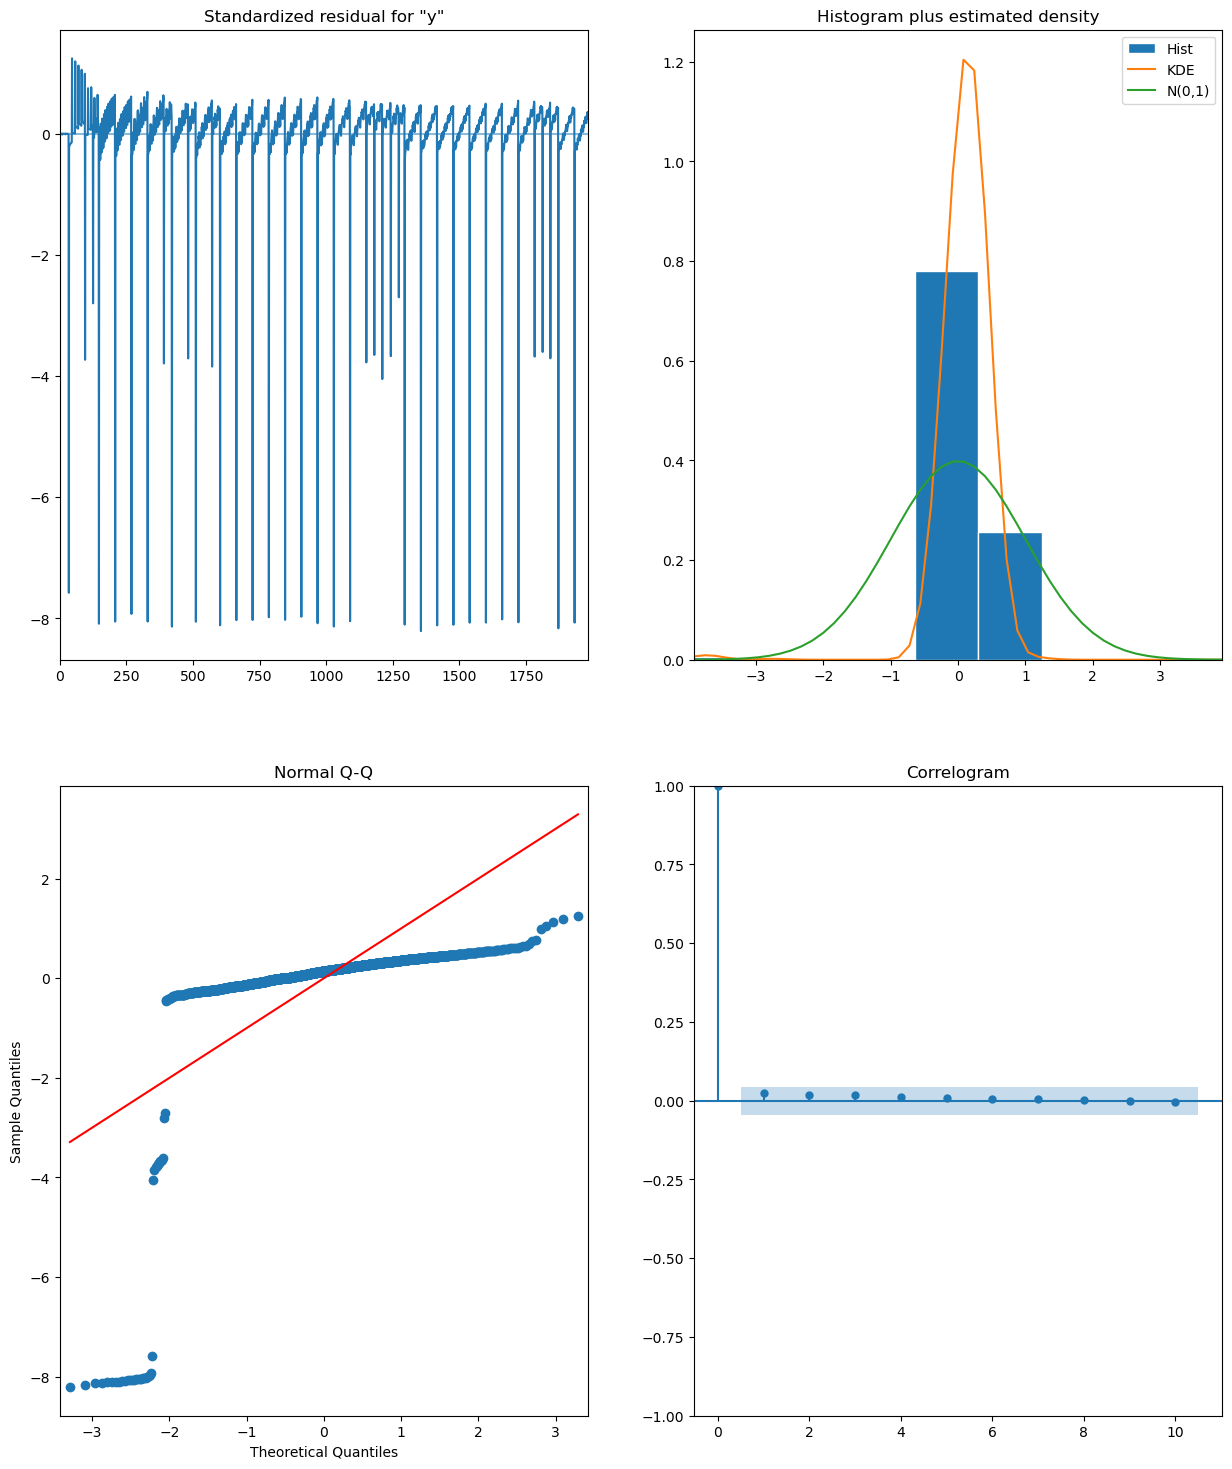

In [32]:
output_df_train.plot_diagnostics(figsize=(15, 18))
plt.show()

In [33]:
# model validation:
df_dev = df_final[2012 : 2022]

In [34]:
ARIMA_MODEL2 = ARIMA(df_dev.iloc[:,10],order=(1, 1, 1))

output_df_train2 = ARIMA_MODEL.fit()
print(output_df_train2.summary().tables[1])

/Users/ryan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9128      0.022     41.899      0.000       0.870       0.956
ma.L1         -1.0000      3.502     -0.286      0.775      -7.863       5.863
ar.S.L12      -0.0003      0.032     -0.010      0.992      -0.064       0.063
ma.S.L12      -1.0000     31.513     -0.032      0.975     -62.764      60.764
sigma2        50.8154   1731.304      0.029      0.977   -3342.477    3444.108


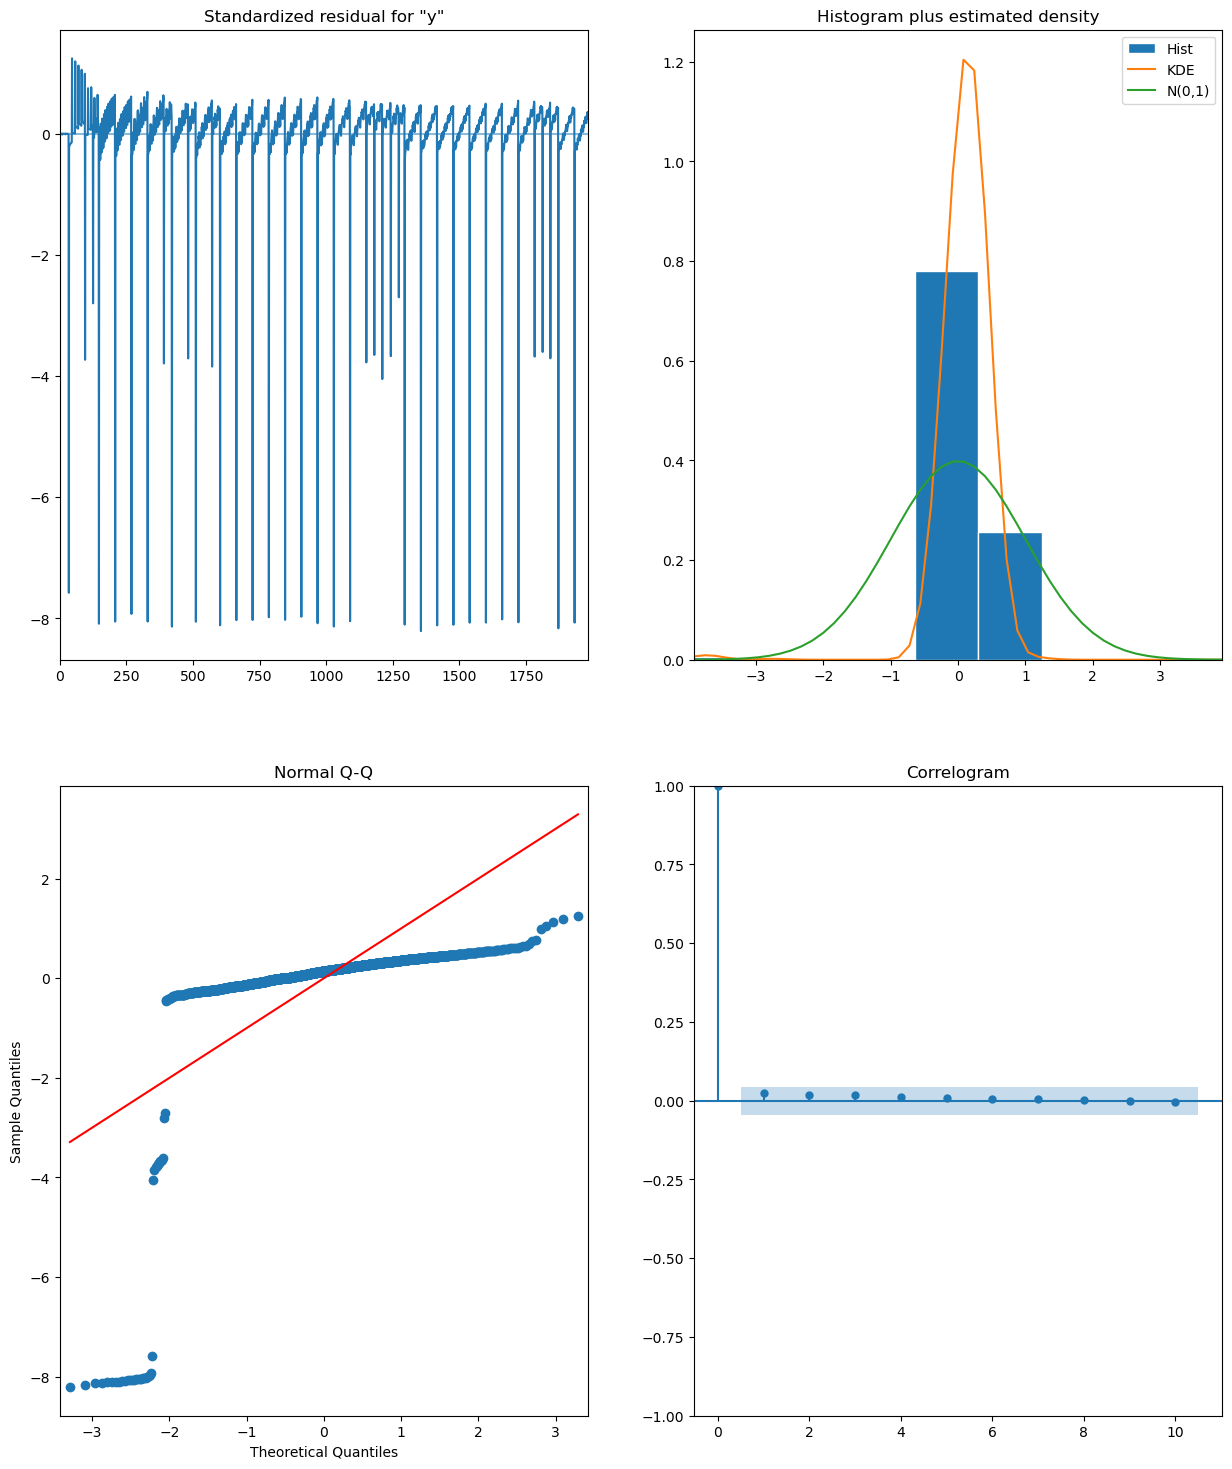

In [35]:
output_df_train2.plot_diagnostics(figsize=(15, 18))
plt.show()